# **이변량분석 : 범주 vs 숫자**

## **1.환경준비**

* 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터 불러오기 : 다음의 예제 데이터를 사용합니다.
> 타이타닉 생존자

|	변수	|	설명	|	값 설명	|
|----|----|----|
|	**survived**	|	생존여부	|	0 - 사망, 1- 생존	|
|	**Pclass**	|	Ticket class	|	1 = 1st, 2 = 2nd, 3 = 3rd	|
|	**Sex**	|	성별	|		|
|	**Age**	|	Age in years	|		|
|	**Sibsp**	|	# of siblings / spouses aboard the Titanic	|		|
|	**Parch**	|	# of parents / children aboard the Titanic	|		|
|	**Ticket**	|	Ticket number	|		|
|	**Fare**	|	Passenger fare	|		|
|	**Cabin**	|	Cabin number	|		|
|	**Embarked**	|	Port of Embarkation	|	C = Cherbourg, Q = Queenstown, S = Southampton	|


In [3]:
# 타이타닉 데이터
titanic = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/titanic.0.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


범주별 숫자를 비교할 때 사용되는 방식은 **범주별 평균 비교** 입니다.  


## **2.시각화**
titanic data에서 Age를 Y로 두고 비교해 봅시다.

### **(1) 평균 비교 : barplot**

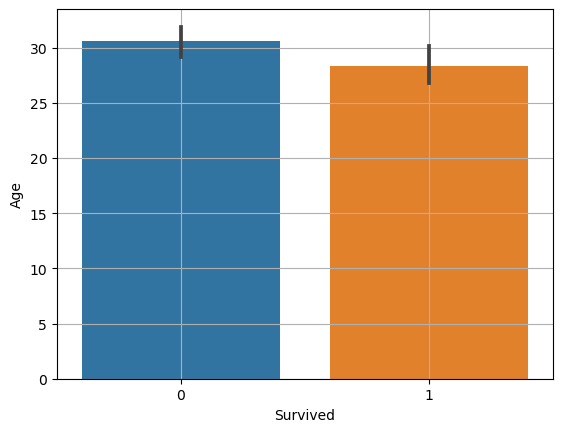

In [3]:
sns.barplot(x="Survived", y="Age", data=titanic)
plt.grid()
plt.show()

In [ ]:
titanic.loc[:10, ['Survived','Age']]

위 두 범주간에 평균에 차이가 있나요?

In [4]:
# 애매하다. 

### **(2) (추가) boxplot**

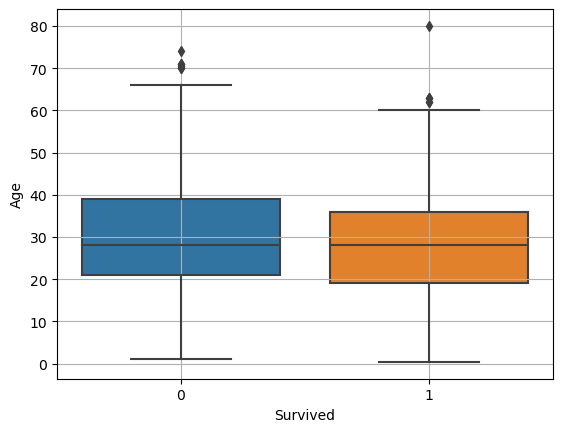

In [5]:
sns.boxplot(x='Survived', y = 'Age', data = titanic)
plt.grid()
plt.show()

## **3.수치화**

### **(1) t-test**

두 집단의 평균을 비교합니다.
* 예제는 Two sample T-test와 양측검정만 다룹니다. 
* 우리는 X --> Y의 관계에서 ,두 변수간에 관련이(차이가) 있는지, 없는지를 확인하는 것이 제일 중요하기 때문입니다.
* 주의사항 : 데이터에 NaN이 있으면 계산이 안됩니다. .notnull() 등으로 NaN을 제외한 데이터를 사용해야 합니다.
* t 통계량
    * 두 평균의 차이를 표준오차로 나눈 값.
    * 기본적으로는 두 평균의 차이로 이해해도 좋습니다.
    * 우리의 가설(대립가설)은 차이가 있다는 것이므로, t 값이 크던지 작던지 하기를 바랍니다. 
    * 보통, t 값이 -2보다 작거나, 2보다 크면 차이가 있다고 봅니다. 

* 이번엔 타이타닉 데이터로 시도해 봅시다.
    * 생존여부 --> Age : 생존여부 별로 나이에 차이가 있을것이다.


#### **1) 데이터 준비**

In [6]:
# 먼저 NaN이 있는지 확인해 봅시다.
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]

In [8]:
# 두 그룹으로 데이터 저장
died = temp.loc[temp['Survived']==0, 'Age']
survived = temp.loc[temp['Survived']==1, 'Age']

#### **2) t-test**

In [9]:
spst.ttest_ind(died, survived)

TtestResult(statistic=2.06668694625381, pvalue=0.03912465401348249, df=712.0)

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] 성별에 따라 운임에 차이가 있을 것이다.

In [11]:
male = titanic.loc[titanic['Sex'] == 'male', 'Fare']
female = titanic.loc[titanic['Sex'] == 'female', 'Fare']

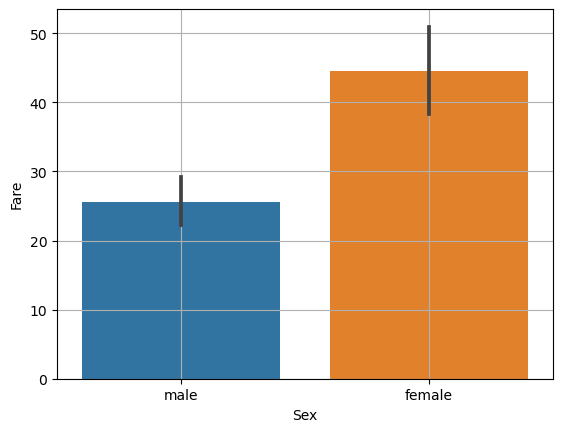

In [15]:
sns.barplot(x='Sex', y='Fare', data=titanic)
plt.grid()
plt.show()

In [13]:
spst.ttest_ind(male, female)

TtestResult(statistic=-5.529140269385719, pvalue=4.2308678700429995e-08, df=889.0)

* [문2] 생존여부에 따라 운임에 차이가 있을 것이다.

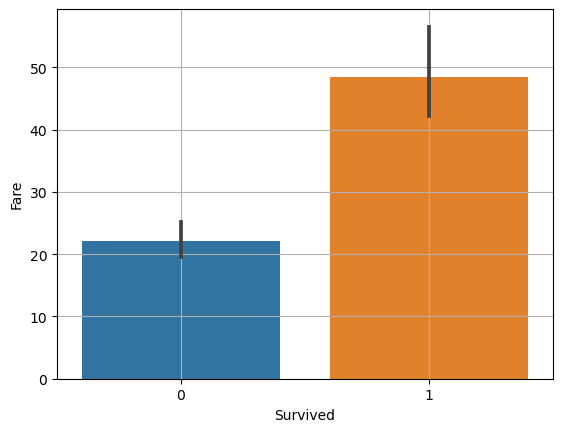

In [16]:
sns.barplot(x='Survived', y='Fare', data=titanic)
plt.grid()
plt.show()

In [20]:
# 평균의 차이가 크고, 신뢰구간도 겹치지 않음 -> 관련 있음

In [19]:
survive = titanic.loc[titanic['Survived'] == 0, 'Fare']
unsurvive = titanic.loc[titanic['Survived'] == 1, 'Fare']

spst.ttest_ind(survive, unsurvive)

TtestResult(statistic=-7.939191660871055, pvalue=6.120189341924198e-15, df=889.0)

### **(2) anova**


* 분산 분석 **AN**alysis **O**f **VA**riance
* 여러 집단 간에 차이는 어떻게 비교할 수 있을까요?
* 여기서 기준은 전체 평균 입니다.
* 𝐹 통계량 = 
    * (집단 간 분산)/(집단 내 분산) = (전체 평균 − 각 집단 평균)/(각 집단의 평균 − 개별 값)
    * 값이 대략 2~3 이상이면 차이가 있다고 판단합니다.

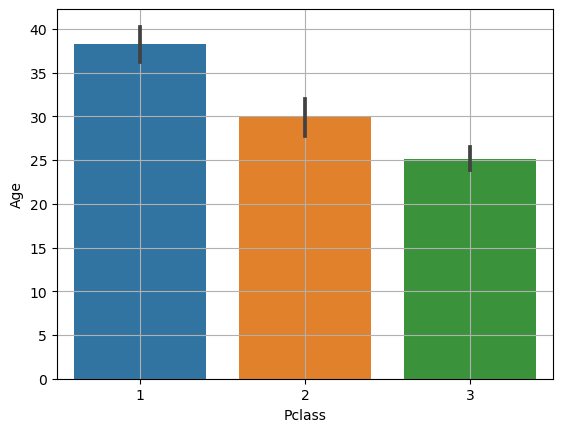

In [4]:
# Pclass(3 범주) --> Age
sns.barplot(x="Pclass", y="Age", data=titanic)
plt.grid()
plt.show()

#### **1) 데이터 준비**

In [5]:
# 1) 분산 분석을 위한 데이터 만들기
# NaN 행 제외
temp = titanic.loc[titanic['Age'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp.Pclass == 1, 'Age']
P_2 = temp.loc[temp.Pclass == 2, 'Age']
P_3 = temp.loc[temp.Pclass == 3, 'Age']

#### **2) anova**

In [6]:
spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

<img src='https://raw.githubusercontent.com/jangrae/img/master/practice_01.png' width=120 align="left"/>

* [문1] 승선지역(Embarked)별로 운임에 차이가 있을 것이다. 
    * 시각화와 수치화로 확인해 봅시다.

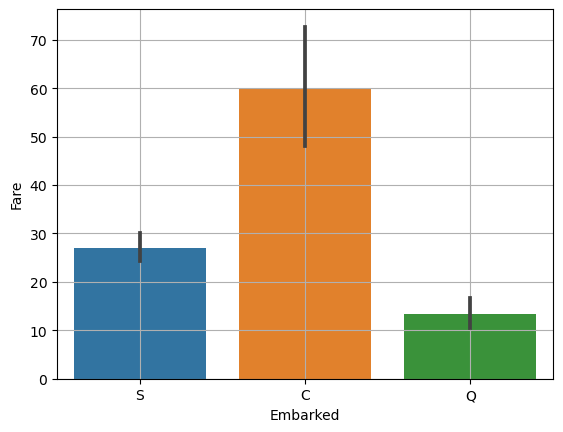

In [13]:
sns.barplot(x="Embarked", y="Fare", data=titanic)
plt.grid()
plt.show()

In [17]:
titanic.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [19]:
temp = titanic.loc[titanic['Embarked'].notnull()]
E_S = temp.loc[temp['Embarked'] == 'S', 'Fare']
E_C = temp.loc[temp['Embarked'] == 'C', 'Fare']
E_Q = temp.loc[temp['Embarked'] == 'Q', 'Fare']

spst.f_oneway(E_S, E_C, E_Q)

F_onewayResult(statistic=38.14030520011266, pvalue=1.2896450252631794e-16)

* [문2] 객실등급(Pclass)별로 운임에 차이가 있을 것이다. 
    * 시각화와 수치화로 확인해 봅시다.

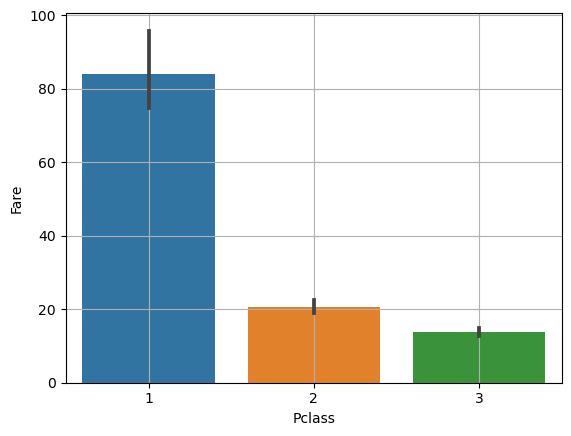

In [15]:
sns.barplot(x="Pclass", y="Fare", data=titanic)
plt.grid()
plt.show()

In [16]:
temp = titanic.loc[titanic['Fare'].notnull()]
# 그룹별 저장
P_1 = temp.loc[temp.Pclass == 1, 'Fare']
P_2 = temp.loc[temp.Pclass == 2, 'Fare']
P_3 = temp.loc[temp.Pclass == 3, 'Fare']

spst.f_oneway(P_1, P_2, P_3)

F_onewayResult(statistic=242.34415651744814, pvalue=1.0313763209141171e-84)

In [20]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## **4.복습문제**

air quality 데이터셋으로 다음 문제를 풀어 봅시다.

* 라이브러리 불러오기

In [21]:
import pandas as pd
import numpy as np
import random as rd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as spst

* 데이터불러오기

In [22]:
# 뉴욕시 공기 오염도 데이터
air = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/air2.csv')
air['Date'] = pd.to_datetime(air['Date'])
air['Month'] = air.Date.dt.month
air['Weekday'] = air.Date.dt.weekday
air['Weekend'] = np.where(air['Weekday'] >=5, 1, 0)
air.head()

,Ozone,Solar.R,Wind,Temp,Date,Month,Weekday,Weekend
0,41,190.0,7.4,67,1973-05-01,5,1,0
1,36,118.0,8.0,72,1973-05-02,5,2,0
2,12,149.0,12.6,74,1973-05-03,5,3,0
3,18,313.0,11.5,62,1973-05-04,5,4,0
4,19,NaN,14.3,56,1973-05-05,5,5,1


* 1) 주말여부(Weekend) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

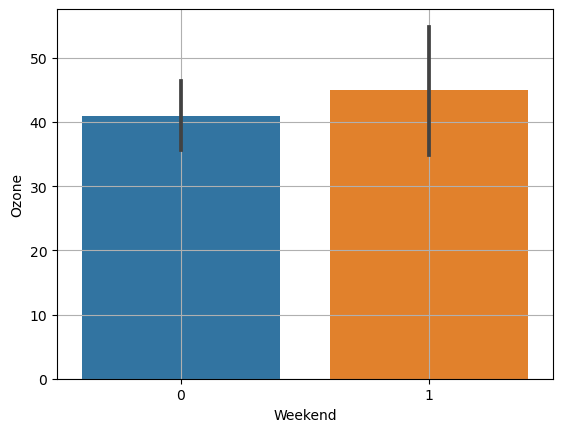

TtestResult(statistic=0.7671489829911908, pvalue=0.4441907648291733, df=151.0)

In [25]:
sns.barplot(x='Weekend', y='Ozone', data=air)
plt.grid()
plt.show()

weekend = air.loc[air['Weekend'] == 1, 'Ozone']
no_weekend = air.loc[air['Weekend'] == 0, 'Ozone']
spst.ttest_ind(weekend, no_weekend)

In [26]:
# 평균의 차이가 많이 나지 않고, 신뢰구간이 겹치므로 관련이 적음
# pvalue도 거의 0.5에 가깝고, t통계량도 2에 가깝지 않으므로 차이가 별로 없음

* 2) 요일(Weekday) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

* 3) 월(Month) --> 오존농도(Ozone)와의 관계를 시각화하고, 가설검정을 수행해 봅시다.

In [3]:
boston = pd.read_csv('https://raw.githubusercontent.com/DA4BAM/dataset/master/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
spst.pearsonr(boston['tax'], boston['medv'])

PearsonRResult(statistic=-0.4685359335677671, pvalue=5.637733627690444e-29)